# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Composite LSTM Autoencoder

</font>
</div>

# What is an Composite LSTM Autoencoder?
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- It is also possible to create a **composite** LSTM Autoencoder that has a single encoder and two decoders:
    - one for reconstruction and 
    - one for prediction.
- This can only be done with Keras funcional API which allows to implement this multi-output model.

</font>
</div>

# Import modules
<hr style="border:2px solid black"> </hr>

In [1]:
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils.vis_utils import plot_model

# Create input and output sequences
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- seq_in has 9 entries
- seq_out has 8 entries

</font>
</div>

In [2]:
# define input sequence
seq_in = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))
# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1

In [14]:
print(seq_in)

[[[0.1]
  [0.2]
  [0.3]
  [0.4]
  [0.5]
  [0.6]
  [0.7]
  [0.8]
  [0.9]]]


In [15]:
print(seq_out)

[[[0.2]
  [0.3]
  [0.4]
  [0.5]
  [0.6]
  [0.7]
  [0.8]
  [0.9]]]


# Modelling
<hr style="border:2px solid black"> </hr>

In [3]:
# define encoder
visible = Input(shape=(n_in,1))
encoder = LSTM(100, activation='relu')(visible)
# define reconstruct decoder
decoder1 = RepeatVector(n_in)(encoder)
decoder1 = LSTM(100, activation='relu', return_sequences=True)(decoder1)
decoder1 = TimeDistributed(Dense(1))(decoder1)
# define predict decoder
decoder2 = RepeatVector(n_out)(encoder)
decoder2 = LSTM(100, activation='relu', return_sequences=True)(decoder2)
decoder2 = TimeDistributed(Dense(1))(decoder2)
# tie it together
model = Model(inputs=visible, outputs=[decoder1, decoder2])
model.compile(optimizer='adam', loss='mse')

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 9, 1)]       0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 100)          40800       input_1[0][0]                    
__________________________________________________________________________________________________
repeat_vector (RepeatVector)    (None, 9, 100)       0           lstm[0][0]                       
__________________________________________________________________________________________________
repeat_vector_1 (RepeatVector)  (None, 8, 100)       0           lstm[0][0]                       
______________________________________________________________________________________________

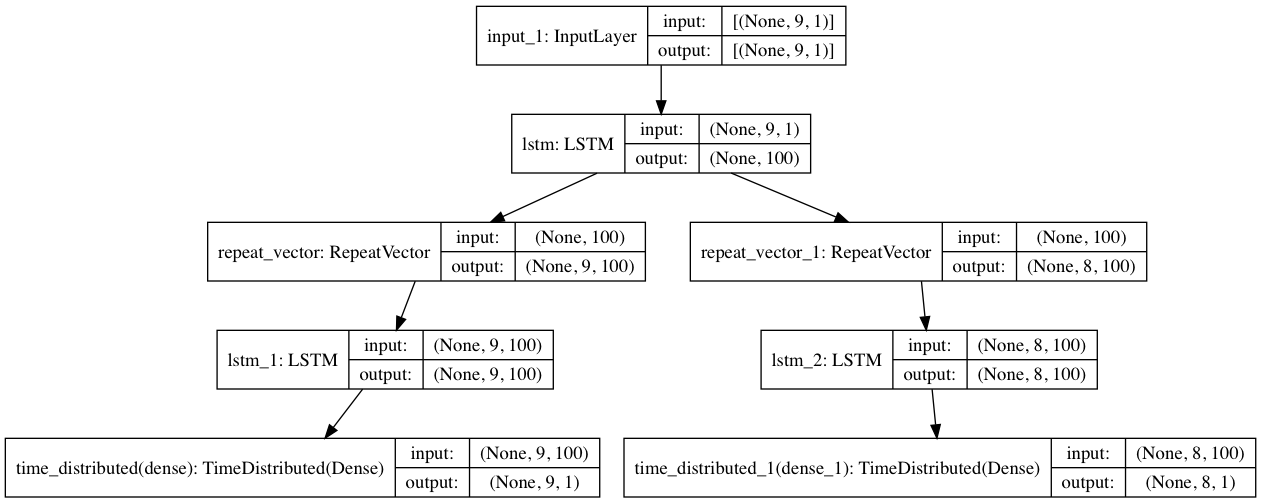

In [5]:
plot_model(model, show_shapes = True)

In [8]:
# fit model
model.fit(seq_in, [seq_in,seq_out], epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 23s 23s/step - loss: 0.6775 - time_distributed_loss: 0.3141 - time_distributed_1_loss: 0.3634
Epoch 2/300
1/1 [==============================] - 0s 13ms/step - loss: 0.6351 - time_distributed_loss: 0.2932 - time_distributed_1_loss: 0.3419
Epoch 3/300
1/1 [==============================] - 0s 13ms/step - loss: 0.5951 - time_distributed_loss: 0.2730 - time_distributed_1_loss: 0.3221
Epoch 4/300
1/1 [==============================] - 0s 13ms/step - loss: 0.5567 - time_distributed_loss: 0.2531 - time_distributed_1_loss: 0.3036
Epoch 5/300
1/1 [==============================] - 0s 13ms/step - loss: 0.5201 - time_distributed_loss: 0.2343 - time_distributed_1_loss: 0.2858
Epoch 6/300
1/1 [==============================] - 0s 13ms/step - loss: 0.4844 - time_distributed_loss: 0.2163 - time_distributed_1_loss: 0.2680
Epoch 7/300
1/1 [==============================] - 0s 14ms/step - loss: 0.4477 - time_distributed_loss: 0.1977 - time_distributed_

1/1 [==============================] - 0s 9ms/step - loss: 3.6439e-04 - time_distributed_loss: 6.1343e-05 - time_distributed_1_loss: 3.0305e-04
Epoch 109/300
1/1 [==============================] - 0s 10ms/step - loss: 3.6137e-04 - time_distributed_loss: 5.9239e-05 - time_distributed_1_loss: 3.0213e-04
Epoch 110/300
1/1 [==============================] - 0s 11ms/step - loss: 3.5740e-04 - time_distributed_loss: 5.6002e-05 - time_distributed_1_loss: 3.0140e-04
Epoch 111/300
1/1 [==============================] - 0s 11ms/step - loss: 3.5224e-04 - time_distributed_loss: 5.1554e-05 - time_distributed_1_loss: 3.0068e-04
Epoch 112/300
1/1 [==============================] - 0s 11ms/step - loss: 3.4654e-04 - time_distributed_loss: 4.6631e-05 - time_distributed_1_loss: 2.9991e-04
Epoch 113/300
1/1 [==============================] - 0s 9ms/step - loss: 3.4138e-04 - time_distributed_loss: 4.2293e-05 - time_distributed_1_loss: 2.9909e-04
Epoch 114/300
1/1 [==============================] - 0s 11ms/s

1/1 [==============================] - 0s 11ms/step - loss: 2.5690e-04 - time_distributed_loss: 1.5805e-05 - time_distributed_1_loss: 2.4109e-04
Epoch 211/300
1/1 [==============================] - 0s 11ms/step - loss: 2.5625e-04 - time_distributed_loss: 1.5678e-05 - time_distributed_1_loss: 2.4057e-04
Epoch 212/300
1/1 [==============================] - 0s 12ms/step - loss: 2.5560e-04 - time_distributed_loss: 1.5552e-05 - time_distributed_1_loss: 2.4005e-04
Epoch 213/300
1/1 [==============================] - 0s 11ms/step - loss: 2.5495e-04 - time_distributed_loss: 1.5427e-05 - time_distributed_1_loss: 2.3953e-04
Epoch 214/300
1/1 [==============================] - 0s 13ms/step - loss: 2.5431e-04 - time_distributed_loss: 1.5302e-05 - time_distributed_1_loss: 2.3900e-04
Epoch 215/300
1/1 [==============================] - 0s 12ms/step - loss: 2.5366e-04 - time_distributed_loss: 1.5178e-05 - time_distributed_1_loss: 2.3848e-04
Epoch 216/300
1/1 [==============================] - 0s 12ms

In [11]:
# demonstrate prediction
yhat = model.predict(seq_in, verbose=0)

In [12]:
print(yhat[0])

[[[0.10653365]
  [0.20242485]
  [0.30024722]
  [0.3990913 ]
  [0.4984972 ]
  [0.59832233]
  [0.69862   ]
  [0.79974693]
  [0.90221184]]]


In [13]:
print(yhat[1])

[[[0.16582245]
  [0.28936395]
  [0.40278977]
  [0.50883734]
  [0.60957444]
  [0.70625794]
  [0.7999199 ]
  [0.8914374 ]]]


In [17]:
try:
    os.remove("./model.png")
except:
    pass

# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- https://machinelearningmastery.com/lstm-autoencoders/    

</font>
</div>